In [1]:
"""
Purpose: To test computing of the confusion matrix for the following:
1) On all of the previously automatically labeled data compared to the proofread version

2) Efficiency of one older auatomatically labeled neuron in comparison to the newer automated version

"""



'\nPurpose: To test computing of the confusion matrix for the following:\n1) On all of the previously automatically labeled data compared to the proofread version\n\n2) Efficiency of one older auatomatically labeled neuron in comparison to the newer automated version\n\n'

In [2]:
import celii_confusion_plotting as cp

# Generating the Labels for each of the test neurons

In [3]:
from OPTIMIZED_whole_neuron_classifier_datajoint_adapted import extract_branches_whole_neuron as op_extract
from whole_neuron_classifier_datajoint_adapted import extract_branches_whole_neuron as unop_extract
import datajoint as dj
import numpy as np
import datajoint as dj
import trimesh
import time

dj.config["database.host"] = "10.28.0.34"
dj.config["database.user"] = "celiib"
dj.config["database.password"] = "newceliipass"
dj.config["safemode"] = True
dj.config["display.limit"] = 20

In [4]:
pinky = dj.create_virtual_module("pinky","microns_pinky")
schema = dj.schema("microns_pinky")

Connecting celiib@10.28.0.34:3306


In [5]:
key = dict(segmentation=3,segment_id=648518346349471910)

In [30]:
key = dict(segmentation=3,segment_id=648518346349471910)
#key = dict(segmentation=3,segment_id=648518346349475536)

In [7]:
""" Do the labels from theh older version """
start_time = time.time()

print("\n\n*****Starting Auto Labeling for " + str(key["segment_id"]) + "******")

segment_id = key["segment_id"]

#get the vertices and faces from datajoint
# get the newly stitched mesh
# get the original mesh


verts,faces = (pinky.PymeshfixDecimatedExcitatoryStitchedMesh() & key).fetch1("vertices","triangles")

cgal_location = "/notebooks/Pass_2_Excitatory_4_Auto_Classifier_Whole_Neuron_Run_2/automatic_classifier_revised_efficiency/temp/"
cgal_file_sdf = "648518346349471910_fixed-cgal_3_0.20_sdf.csv"
cgal_file_seg = "648518346349471910_fixed-cgal_3_0.20.csv"

#run the whole algorithm on the neuron to test
verts_labels, faces_labels = unop_extract(import_Off_Flag=False,segment_id=segment_id,vertices=verts,
                     triangles=faces,pymeshfix_Flag=False,
                     import_CGAL_Flag=True,
                     import_CGAL_paths = [cgal_location + cgal_file_seg,
                                         cgal_location + cgal_file_sdf],
                     return_Only_Labels=True,
                     clusters=3,
                     smoothness=0.2)

print(f"Finished Auto Labeling: {time.time() - start_time}")




*****Starting Auto Labeling for 648518346349471910******
1) Starting: Mesh importing and Pymesh fix
loading mesh from vertices and triangles array
1) Finished: Mesh importing and Pymesh fix: 0.27881622314453125
2) Staring: Generating CGAL segmentation for neuron
2) Finished: Generating CGAL segmentation for neuron: 55.4955837726593
3) Staring: Generating Graph Structure and Identifying Soma
soma_index = 0
3) Finished: Generating Graph Structure and Identifying Soma: 1.4791319370269775
5) Staring: Finding Apical Index
Soma Index = 0
Soma Connections = [133, 49, 112, 240, 130, 25, 33, 14, 5, 21, 26, 24, 139, 7, 53, 40, 113, 167, 201, 134]
soma_80_percent = 202908.340625
Debugging the axon filter
[(133, 202365.28125), (49, 216520.34375), (112, 199124.46875), (240, 200865.484375), (130, 202071.296875), (25, 222924.40625), (33, 224779.671875), (14, 218674.203125), (5, 231824.125), (21, 232195.578125), (26, 198520.734375), (24, 200045.6875), (139, 205107.015625), (7, 207411.484375), (53, 2

In [8]:
""" Do the labels from theh older version """
start_time = time.time()

print("\n\n*****Starting Auto Labeling for " + str(key["segment_id"]) + "******")

segment_id = key["segment_id"]

#get the vertices and faces from datajoint
# get the newly stitched mesh
# get the original mesh


verts,faces = (pinky.PymeshfixDecimatedExcitatoryStitchedMesh() & key).fetch1("vertices","triangles")

cgal_location = "/notebooks/Pass_2_Excitatory_4_Auto_Classifier_Whole_Neuron_Run_2/automatic_classifier_revised_efficiency/temp/"
cgal_file_sdf = "648518346349471910_fixed-cgal_3_0.20_sdf.csv"
cgal_file_seg = "648518346349471910_fixed-cgal_3_0.20.csv"

#run the whole algorithm on the neuron to test
verts_labels_opt, faces_labels_opt = op_extract(import_Off_Flag=False,segment_id=segment_id,vertices=verts,
                     triangles=faces,pymeshfix_Flag=False,
                     import_CGAL_Flag=True,
                     import_CGAL_paths = [cgal_location + cgal_file_seg,
                                         cgal_location + cgal_file_sdf],
                     return_Only_Labels=True,
                     clusters=3,
                     smoothness=0.2)

print(f"Finished Auto Labeling: {time.time() - start_time}")




*****Starting Auto Labeling for 648518346349471910******
1) Starting: Mesh importing and Pymesh fix
loading mesh from vertices and triangles array
1) Finished: Mesh importing and Pymesh fix: 0.20518970489501953
2) Staring: Generating CGAL segmentation for neuron
2) Finished: Generating CGAL segmentation for neuron: 59.99108934402466
3) Staring: Generating Graph Structure and Identifying Soma
soma_index = 0
3) Finished: Generating Graph Structure and Identifying Soma: 1.4590811729431152
5) Staring: Finding Apical Index
Soma Index = 0
Soma Connections = [133, 49, 112, 240, 130, 25, 33, 14, 5, 21, 26, 24, 139, 7, 53, 40, 113, 167, 201, 134]
soma_80_percent = 200871.95625
possible_Axons_filter_1 = [112, 130, 24, 26, 240, 167]
size_threshold_filter = [24, 26]
height_threshold_filter = [24, 26]
sdf_threshold_filter = [112, 130, 24, 26, 167]
possible_Axons_filter_2 = [24, 26]
possible_Apical = 24
5) Finished: Finding Apical Index: 2.871255397796631
6) Staring: Classifying Entire Neuron
21 =

# COMPUTING THE CONFUSION MATRIX FOR BOTH OF THE OPTIONS

In [9]:
actual_labels = (pinky.ProofreadLabel & key).fetch1("triangles")

In [10]:
#make sure they are all the same size
print(len(faces_labels),len(faces_labels_opt),len(actual_labels))

1320374 1320374 1320374


In [12]:
import celii_confusion_plotting as cp
import importlib
importlib.reload(cp)
help(cp.plot_confusion_matrix_from_raw_data)

Help on function plot_confusion_matrix_from_raw_data in module celii_confusion_plotting:

plot_confusion_matrix_from_raw_data(y_true, y_pred, classes, cm_labels=[], normalize=True, title=None, cmap=<matplotlib.colors.LinearSegmentedColormap object at 0x7f2a251fd400>)
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    
    Example: 
    y_true = [0, 0, 1, 1, 2, 0, 1]
    y_pred = [0, 1, 0, 1, 2, 2, 1]
    
    classes = np.array(["Apical","Basal","Oblique"])
    plot_confusion_matrix_from_raw_data(y_true,y_pred,normalize=True,classes=classes,
                         title="Brendan's Confusion")
    done



In [21]:
Label_key_data = pinky.LabelKey.fetch(as_dict=True)
kept_data = Label_key_data[2:9] + Label_key_data[10:13]
kept_data

classes = [k["description"] for k in kept_data]
cm_labels = [k["numeric"] for k in kept_data]
classes.append("unknown")
cm_labels.append(13)

In [22]:
cm_labels

[2, 3, 4, 5, 6, 7, 8, 10, 11, 12, 13]

/notebooks/Pass_2_Excitatory_4_Auto_Classifier_Whole_Neuron_Run_2/automatic_classifier_revised_efficiency/celii_confusion_plotting.py:44: RuntimeWarning: invalid value encountered in true_divide
  cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]


Normalized confusion matrix


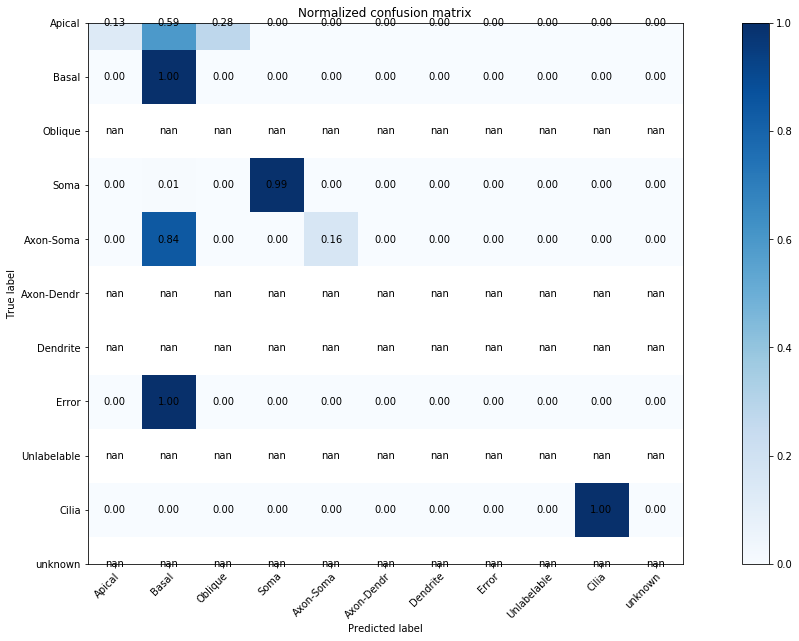

In [23]:
cp.plot_confusion_matrix_from_raw_data(y_true=actual_labels,
                                       y_pred=faces_labels_opt,
                                       classes=classes,
                                       cm_labels=cm_labels)

In [28]:
#how to print out the actual labels
#export the labels
labels_opt = faces_labels_opt.astype("int")
np.savetxt("temp/" + str(key["segment_id"]) + '_optimized_output_labels.csv', labels_opt, fmt='%d', delimiter='\n')

In [25]:
#change all of the labels that are above allowed value to unknown
faces_labels[faces_labels>=13] = 13

from collections import Counter
Counter(faces_labels)

Counter({5.0: 75616, 13.0: 1238835, 6.0: 5442, 12.0: 481})

Normalized confusion matrix


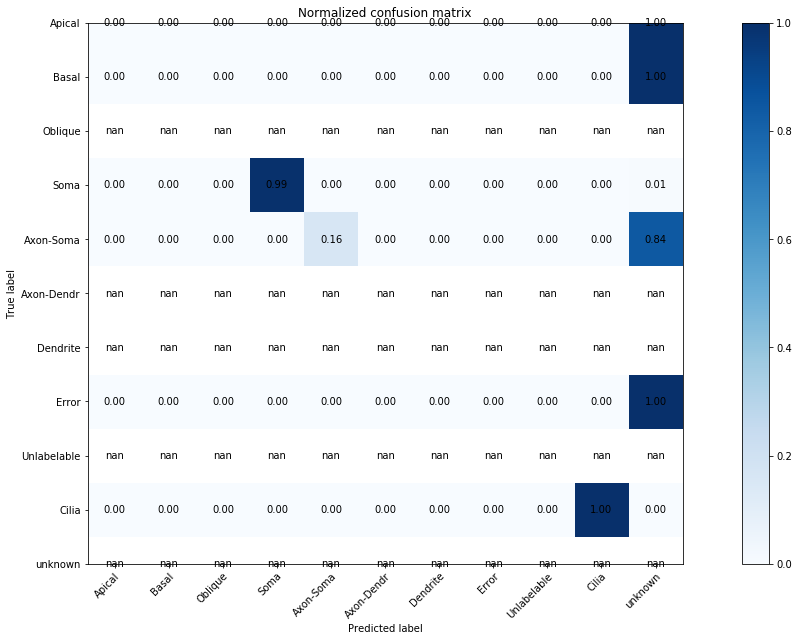

In [26]:
#change all of the labels that are above allowed value to unknown
faces_labels[faces_labels>=13] = 13

cp.plot_confusion_matrix_from_raw_data(y_true=actual_labels,
                                       y_pred=faces_labels,
                                       classes=classes,
                                       cm_labels=cm_labels)

In [29]:
#how to print out the actual labels
#export the labels
labels = faces_labels.astype("int")
np.savetxt("temp/" + str(key["segment_id"]) + 'NOT_optimized_output_labels.csv', labels, fmt='%d', delimiter='\n')